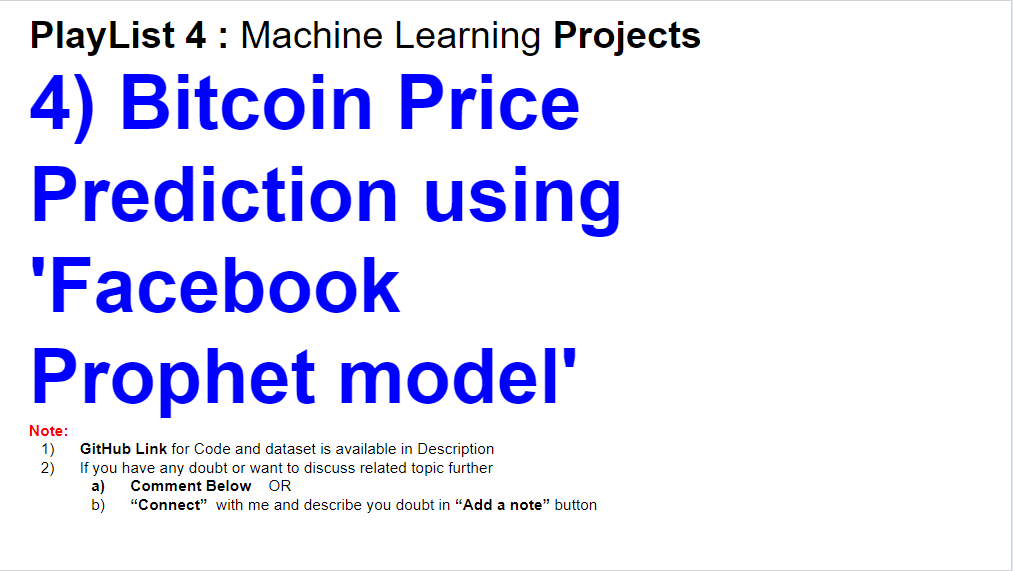

In [1]:
import pandas as pd
df0 = pd.read_csv('BTC-USD.csv')
df0

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-20,55887.335938,57505.226563,54626.558594,56099.519531,56099.519531,68145460026
1,2021-02-21,56068.566406,58330.570313,55672.609375,57539.945313,57539.945313,51897585191
2,2021-02-22,57532.738281,57533.390625,48967.566406,54207.320313,54207.320313,92052420332
3,2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,48824.425781,106102492824
4,2021-02-24,48835.085938,51290.136719,47213.500000,49705.332031,49705.332031,63695521388
...,...,...,...,...,...,...,...
361,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
362,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
363,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704
364,2022-02-19,40026.023438,40418.878906,39713.058594,40122.156250,40122.156250,13736557863


In [2]:
df1 = df0[['Date','Close']]
df1

,Date,Close
0,2021-02-20,56099.519531
1,2021-02-21,57539.945313
2,2021-02-22,54207.320313
3,2021-02-23,48824.425781
4,2021-02-24,49705.332031
...,...,...
361,2022-02-16,43961.859375
362,2022-02-17,40538.011719
363,2022-02-18,40030.976563
364,2022-02-19,40122.156250


In [3]:
# The Facebook Prophet model only works with data that contains 
    #a string time-series format in a column called “ds” and 
    #continuous values in a column called “y”
df1.columns = ['ds','y']
df1

,ds,y
0,2021-02-20,56099.519531
1,2021-02-21,57539.945313
2,2021-02-22,54207.320313
3,2021-02-23,48824.425781
4,2021-02-24,49705.332031
...,...,...
361,2022-02-16,43961.859375
362,2022-02-17,40538.011719
363,2022-02-18,40030.976563
364,2022-02-19,40122.156250


In [4]:
# fitting the data into "Facebook Prophet model"

from fbprophet import Prophet
prophet = Prophet()
prophet.fit(df1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


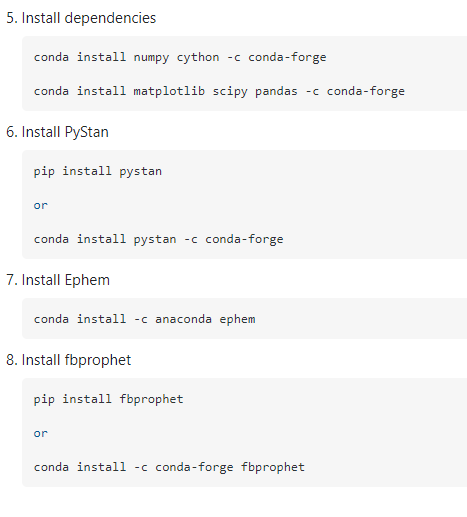

Now let’s make predictions. The make_future_dataframe method in Prophet model has a parameter named as ‘periods’, we can use it to set the amount of time we need to make predictions. Now let’s make predictions for the next 365 days:

In [5]:
future = prophet.make_future_dataframe(periods=365)
future

,ds
0,2021-02-20
1,2021-02-21
2,2021-02-22
3,2021-02-23
4,2021-02-24
...,...
726,2023-02-16
727,2023-02-17
728,2023-02-18
729,2023-02-19


In [6]:
forecast = prophet.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-02-20,55475.276140,49860.298454,61312.283931
1,2021-02-21,55641.522938,50137.316893,61341.045584
2,2021-02-22,55539.721742,50277.814476,61681.640586
3,2021-02-23,55410.422601,49751.115818,61327.924004
4,2021-02-24,55503.235915,49692.938545,61322.695360
...,...,...,...,...
726,2023-02-16,-42922.225889,-138864.195244,38671.473634
727,2023-02-17,-43062.521263,-138295.534851,36272.027932
728,2023-02-18,-43179.214097,-138190.463496,38694.554922
729,2023-02-19,-43219.146462,-139482.585781,37563.880233


C:\Users\Kapil\AppData\Local\Temp/ipykernel_6368/3977498607.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


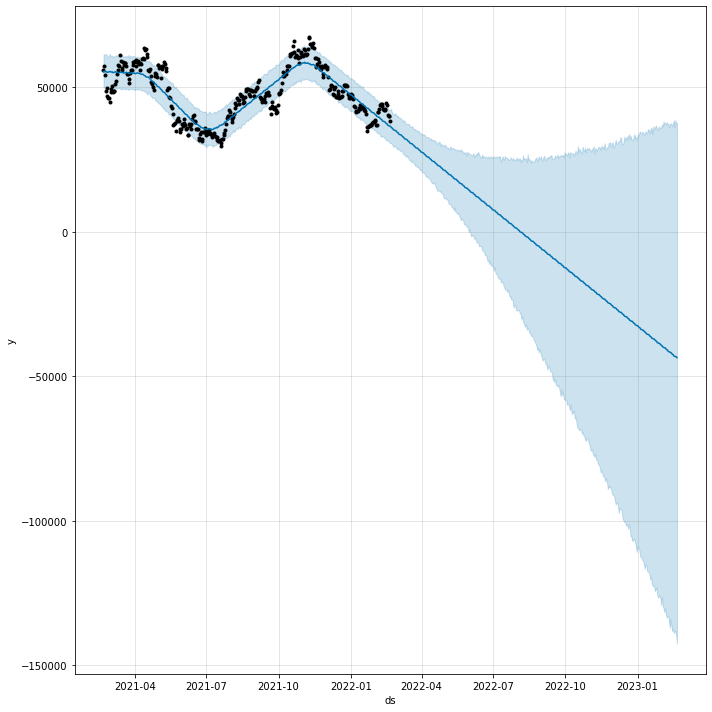

In [8]:
#Now let’s plot our predictions:
from fbprophet.plot import plot
figure = prophet.plot(forecast, figsize=(10,10))
figure.show()

### Conclusion
There are several interpretations of the forecasts calculated by the "Facebook prophet model" like 

the current momentum for the bitcoin pricesis downwards, and hence, 

we are likely to see a very rapid decrease in the prices of bitcoin.